<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-6rylsvn4
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-6rylsvn4
CPU times: user 218 ms, sys: 85.5 ms, total: 303 ms
Wall time: 20.9 s


In [38]:
pip install owslib

In [39]:
import pandas as pd
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [40]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_plan_ala_osa',
 'planeeringud:maaamet__r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fb321d50>,
      dtype=object)

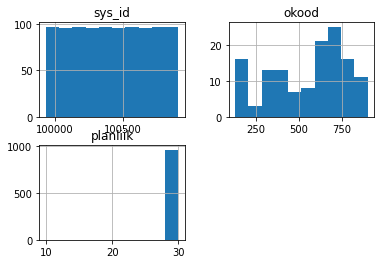

In [41]:
data.hist()


In [42]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

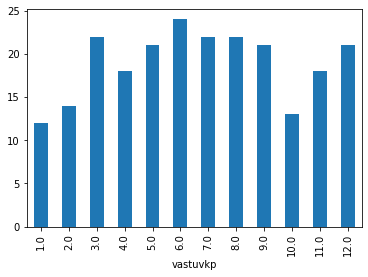

In [43]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

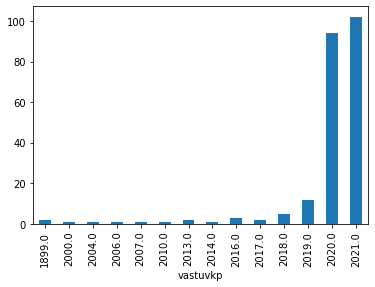

In [44]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.year).count().plot(kind="bar")

In [45]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,99937,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6..."
1,detail_plan_ala.1,99938,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6..."
2,detail_plan_ala.2,99939,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6..."
3,detail_plan_ala.3,99940,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6..."
4,detail_plan_ala.4,99941,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,detail_plan_ala.961,100898,14108,DP_plan_ala,7,NaN,NÕMME TEE 30 KINNISTU DETAILPLANEERING,30,Detailplaneering,Kavandada kaks elamumaakrunti ridaelamu ehitam...,10,Planeering on kehtiv,None,NaT,2004-01-21,Ei,"<a target=""_blank"" href=https://tpr.tallinn.ee...",None,None,None,None,jah,taasdigiteeritud hindamise jaoks,Ei,Digitaliseeritud,2021-12-23,"POLYGON ((540908.660 6587054.430, 540912.340 6..."
962,detail_plan_ala.962,100899,14197,DP_plan_ala,4,NaN,HANE TN 8 KRUNDI DETAILPLANEERING,30,Detailplaneering,Kavandada 1 elamumaakrunt ühe 4‑korruselise ko...,10,Planeering on kehtiv,None,NaT,2006-11-30,ei,"<a target=""_blank"" href=https://tpr.tallinn.ee...",None,None,None,None,jah,taasdigiteeritud hindamise jaoks,ei,Digitaliseeritud,2021-12-23,"POLYGON ((540150.720 6586111.390, 540206.570 6..."
963,detail_plan_ala.963,100900,14710,DP_plan_ala,18,NaN,"KEEMIA TN 5, 5A JA 7 KINNISTUTE DETAILPLANEERING",30,Detailplaneering,Ehitusõiguse andmine kuni 5‑korruselise ja kun...,10,Planeering on kehtiv,None,NaT,2008-05-29,ei,"<a target=""_blank"" href=https://tpr.tallinn.ee...",None,None,None,None,jah,taasdigiteeritud hindamise jaoks,jah,Digitaliseeritud,2021-12-23,"MULTIPOLYGON (((540263.520 6588005.700, 540265..."
964,detail_plan_ala.964,100901,14738,DP_plan_ala,4,NaN,

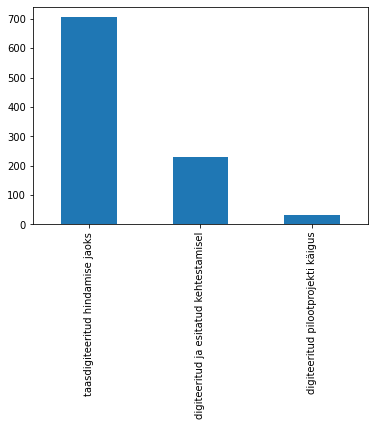

In [46]:
data["plan_kihid"].value_counts()[:10].plot(kind='bar')

In [47]:
pd.unique(data["vastuvkp"])

array(['2020-09-08T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-02-26T00:00:00.000000000', '2021-03-24T00:00:00.000000000',
                                 'NaT', '2021-03-09T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-02-25T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-08-03T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-13T00:00:00.000000000',
       '2020-11-25T00:00:00.000000000', '2017-08-09T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2019-10-23T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2016-06-22T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2020-05-27T00:00:00.000000000',
       '2021-05-19T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2020-10-10T00:00:00.000000000', '2021-05-04

# Krunt

In [49]:
layer = layers[7]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
krunt = gpd.read_file(q)

In [50]:
krunt

,id,sys_id,planid,objectid,dp_kiht,oid,okood,otstarve,tingimus,pind,tahis,nimetus,parkimis_arv,allikas,stamp_upd,geometry
0,detail_plan_krunt.0,566318,1182,2,DP_krunt,1,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524122.900 6561694.600, 524188.250 6..."
1,detail_plan_krunt.1,566319,1182,1,DP_krunt,2,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524112.940 6561816.240, 524188.250 6..."
2,detail_plan_krunt.2,566320,1180,3,DP_krunt,1,725.0,Elamumaa,None,2629.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521111.910 6564343.720, 521135.100 6..."
3,detail_plan_krunt.3,566321,1180,12,DP_krunt,5,725.0,Elamumaa,None,1142.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((520995.350 6564304.020, 521016.370 6..."
4,detail_plan_krunt.4,566322,1180,üldmaa,DP_krunt,16,725.0,Üldkasutatav maa,None,10187.0,Ü;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521016.840 6564426.160, 521063.110 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,detail_plan_krunt.4104,570422,93593,4,DP_krunt,10,890.0,Tee ja tänava maa,None,4211.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550269.825 6..."
4105,detail_plan_krunt.4105,570423,93593,5,DP_krunt,9,890.0,Tee ja tänava maa,None,3408.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550148.620 6595938.490, 550159.950 6..."
4106,detail_plan_krunt.4106,570424,93593,2,DP_krunt,6,890.0,Looduslik maa,None,3261.0,HL,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550273.370 6..."
4107,detail_plan_krunt.4107,570425,90412,2,DP_krunt,4,NaN,Maatulundusmaa,None,39176.0,M;,Pos2,None,MA sisestatud,2021-11-17,"POLYGON ((396201.833 6486848.786, 396335.080 6..."


In [51]:
krunt.otstarve.value_counts().to_frame()

,otstarve
Elamumaa,356
Ä 100,250
Elamumaa,250
EK,208
Ä,197
...,...
Elamumaa 0-95%; Ärimaa 5-100%,1
Ä 80; Ek 20,1
80...100% tootmishoone maa (TT);\n0...20% kontori- ja büroohoone maa (ÄB),1
Ä 25; Th 75,1


In [52]:
krunt.otstarve.str.split(pat=";")[1][1]
#.value_counts().to_frame()

' Elamumaa 35'

In [56]:
krunt.iloc[i]

id                                         detail_plan_krunt.4107
sys_id                                                     570425
planid                                                     90412 
objectid                                                        2
dp_kiht                                                  DP_krunt
oid                                                             4
okood                                                         NaN
otstarve                                          Maatulundusmaa 
tingimus                                                     None
pind                                                        39176
tahis                                                        M;  
nimetus                                                      Pos2
parkimis_arv                                                 None
allikas                                             MA sisestatud
stamp_upd                                              2021-11-17
geometry  

In [69]:
df = pd.DataFrame()
i=23
df['index'] = [i]

df

,index
0,23


In [71]:
df.at[0, 'index'] = 10
df

,index
0,10


In [89]:
for n in range(2):
  print(n)

0
1


In [88]:
len(krunt.iloc[1].otstarve.split(";"))

2

In [99]:
soid=10000
df = pd.DataFrame()
for i in krunt.index.values.tolist():
  #print(krunt.iloc[i].otstarve)
  if (krunt.iloc[i].otstarve is not None):
    so_arv = len(krunt.iloc[i].otstarve.split(";"))
  else:
    so_arv = 1
  
  for j in range(so_arv):
    df.at[soid, 'index'] = i
    df.at[soid, 'oid'] = int(krunt.iloc[i].oid)
    df.at[soid, 'index'] = krunt.iloc[i].planid
    df.at[soid, 'algne_otstarve'] = krunt.iloc[i].otstarve
    df.at[soid, 'algne_tahis'] = krunt.iloc[i].tahis
    df.at[soid, 'so_arv'] = so_arv
    df.at[soid, 'soid'] = soid
    soid=soid+1



df


,index,oid,algne_otstarve,algne_tahis,so_arv,soid
10000,1182.0,1.0,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2.0,10000.0
10001,1182.0,1.0,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2.0,10001.0
10002,1182.0,2.0,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2.0,10002.0
10003,1182.0,2.0,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2.0,10003.0
10004,1180.0,1.0,Elamumaa,E;,1.0,10004.0
...,...,...,...,...,...,...
14966,93593.0,10.0,Tee ja tänava maa,LT,1.0,14966.0
14967,93593.0,9.0,Tee ja tänava maa,LT,1.0,14967.0
14968,93593.0,6.0,Looduslik maa,HL,1.0,14968.0
14969,90412.0,4.0,Maatulundusmaa,M;,1.0,14969.0


In [95]:
df.dtypes

index             float64
oid               float64
algne_otstarve     object
algne_tahis        object
so_arv            float64
soid              float64
dtype: object